In [ ]:
!pip install tensorflow

In [2]:
import tensorflow as tf
from tensorflow import keras

print(tf.keras.__version__)

2.12.0


In [3]:
# Loading MNIST dataset
mnist = keras.datasets.mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
# Data Exploration
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [5]:
RESHAPED = 784 # 28x28 = 784 neurons
X_train = X_train.reshape(60000, RESHAPED)
X_test = X_test.reshape(10000, RESHAPED)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

Y_train = tf.keras.utils.to_categorical(Y_train, 10)
Y_test = tf.keras.utils.to_categorical(Y_test, 10)


60000 train samples
10000 test samples


In [6]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
model_1 = Sequential()

model_1.add(Dense(10,input_shape=(784,),name='dense_layer', activation='softmax'))

In [7]:
# Compiling the model.
model_1.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
# Training the model.
training = model_1.fit(X_train, Y_train, batch_size=64, epochs=70, validation_split=0.2)

Epoch 1/70
750/750 [==============================] - 2s 2ms/step - loss: 1.0849 - accuracy: 0.7454 - val_loss: 0.6563 - val_accuracy: 0.8577
Epoch 2/70
750/750 [==============================] - 2s 2ms/step - loss: 0.6070 - accuracy: 0.8555 - val_loss: 0.5092 - val_accuracy: 0.8767
Epoch 3/70
750/750 [==============================] - 2s 3ms/step - loss: 0.5116 - accuracy: 0.8712 - val_loss: 0.4508 - val_accuracy: 0.8856
Epoch 4/70
750/750 [==============================] - 2s 2ms/step - loss: 0.4653 - accuracy: 0.8790 - val_loss: 0.4186 - val_accuracy: 0.8903
Epoch 5/70
750/750 [==============================] - 2s 2ms/step - loss: 0.4368 - accuracy: 0.8844 - val_loss: 0.3977 - val_accuracy: 0.8939
Epoch 6/70
750/750 [==============================] - 1s 2ms/step - loss: 0.4171 - accuracy: 0.8880 - val_loss: 0.3822 - val_accuracy: 0.9004
Epoch 7/70
750/750 [==============================] - 1s 2ms/step - loss: 0.4023 - accuracy: 0.8912 - val_loss: 0.3709 - val_accuracy: 0.9028
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


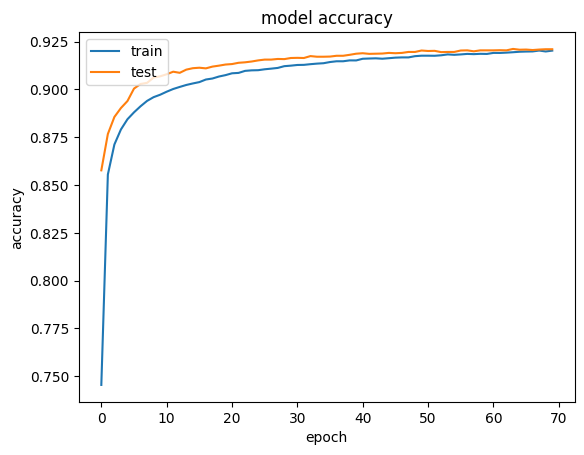

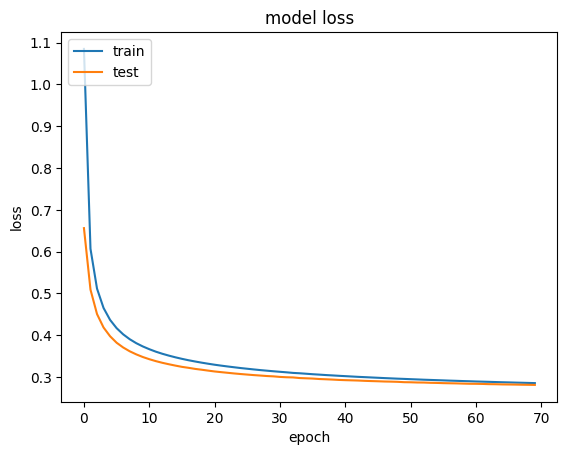

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

print(training.history.keys())

plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [11]:
#evaluate the model
test_loss, test_acc = model_1.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.2825 - accuracy: 0.9220
Test accuracy: 0.921999990940094


In [12]:
model_1.get_config()

{'name': 'sequential',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_layer_input'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_layer',
    'trainable': True,
    'dtype': 'float32',
    'batch_input_shape': (None, 784),
    'units': 10,
    'activation': 'softmax',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}}]}

In [13]:
model_2 = tf.keras.Sequential()
N_hidden = 64

model_2.add(Dense(N_hidden, name='dense_layer', input_shape=(784,), activation = 'relu'))

# Adding another dense layer:
model_2.add(Dense(N_hidden, name='dense_layer_2', activation='relu'))
model_2.add(Dense(10, name='dense_layer_3', activation = 'softmax'))

# Compiling the model.
model_2.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Training the model.
training = model_2.fit(X_train, Y_train, batch_size=64, epochs=100, validation_split=0.2)

Epoch 1/100
750/750 [==============================] - 3s 3ms/step - loss: 1.1241 - accuracy: 0.6954 - val_loss: 0.4798 - val_accuracy: 0.8814
Epoch 2/100
750/750 [==============================] - 2s 3ms/step - loss: 0.4298 - accuracy: 0.8833 - val_loss: 0.3465 - val_accuracy: 0.9041
Epoch 3/100
750/750 [==============================] - 2s 3ms/step - loss: 0.3514 - accuracy: 0.9006 - val_loss: 0.3085 - val_accuracy: 0.9123
Epoch 4/100
750/750 [==============================] - 2s 3ms/step - loss: 0.3175 - accuracy: 0.9099 - val_loss: 0.2852 - val_accuracy: 0.9205
Epoch 5/100
750/750 [==============================] - 3s 3ms/step - loss: 0.2952 - accuracy: 0.9149 - val_loss: 0.2685 - val_accuracy: 0.9237
Epoch 6/100
750/750 [==============================] - 2s 3ms/step - loss: 0.2779 - accuracy: 0.9195 - val_loss: 0.2550 - val_accuracy: 0.9287
Epoch 7/100
750/750 [==============================] - 2s 3ms/step - loss: 0.2630 - accuracy: 0.9247 - val_loss: 0.2448 - val_accuracy: 0.9303

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


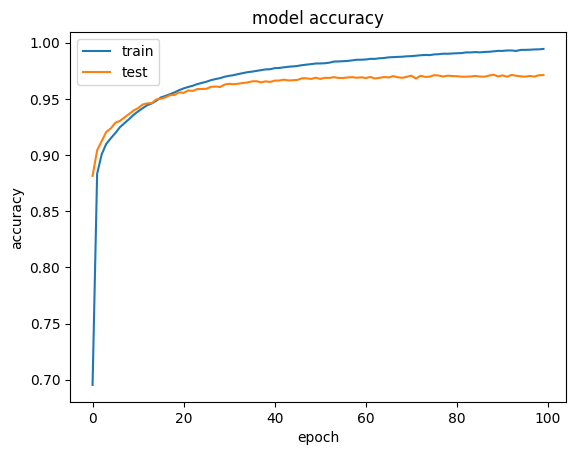

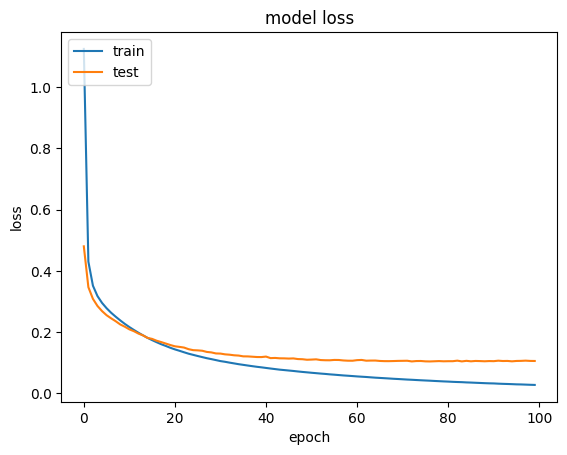

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

print(training.history.keys())

plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [15]:
#evaluate the model
test_loss, test_acc = model_1.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.2825 - accuracy: 0.9220
Test accuracy: 0.921999990940094
